# 📌 Extracción

In [1]:
import json
import pandas as pd

with open('TelecomX_Data.json', 'r') as archivo:
    data = json.load(archivo) # lista de diccionarios

# creando el dataframe a partir del json
df = pd.DataFrame(data)

df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [2]:
# normalize hace que las estructuras anidadas se conviertan en columnas planas
df = pd.json_normalize(data)
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


# 🔧 Transformación

## Conociendo el conjunto de datos

**`.shape` muestra la cantidad de filas y columnas**

In [3]:
df.shape

(7267, 21)

**`.info()` Ayuda a entender la estructura del DataFrame, no tiene valores nulos**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

**`.dtypes` Muestra el tipo de dato de cada columna**

In [5]:
df.dtypes

customerID                    object
Churn                         object
customer.gender               object
customer.SeniorCitizen         int64
customer.Partner              object
customer.Dependents           object
customer.tenure                int64
phone.PhoneService            object
phone.MultipleLines           object
internet.InternetService      object
internet.OnlineSecurity       object
internet.OnlineBackup         object
internet.DeviceProtection     object
internet.TechSupport          object
internet.StreamingTV          object
internet.StreamingMovies      object
account.Contract              object
account.PaperlessBilling      object
account.PaymentMethod         object
account.Charges.Monthly      float64
account.Charges.Total         object
dtype: object

## Comprobación de incoherencias en los datos

**Verificando valores únicos en cada columna para detectar posibles incoherencias**

In [6]:
# Recorremos las columnas para ver los valores únicos en cada una
for col in df.columns:
  print(f" Valores unicos en la columna'{col}: {df[col].nunique()}'")

  if df[col].nunique() < 50:
    print(df[col].unique())
    print('-' * 50)

 Valores unicos en la columna'customerID: 7267'
 Valores unicos en la columna'Churn: 3'
['No' 'Yes' '']
--------------------------------------------------
 Valores unicos en la columna'customer.gender: 2'
['Female' 'Male']
--------------------------------------------------
 Valores unicos en la columna'customer.SeniorCitizen: 2'
[0 1]
--------------------------------------------------
 Valores unicos en la columna'customer.Partner: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'customer.Dependents: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'customer.tenure: 73'
 Valores unicos en la columna'phone.PhoneService: 2'
['Yes' 'No']
--------------------------------------------------
 Valores unicos en la columna'phone.MultipleLines: 3'
['No' 'Yes' 'No phone service']
--------------------------------------------------
 Valores unicos en la columna'internet.InternetService: 3'
['DSL' 'Fiber o

**Valores Duplicados**

In [7]:
print("Numero de duplicados", df.duplicated().sum())

Numero de duplicados 0


**Valores nulos**

In [8]:
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


**Valores vacíos**

In [9]:
df.apply(lambda x: x.astype(str).str.strip() == '').sum()

customerID                     0
Churn                        224
customer.gender                0
customer.SeniorCitizen         0
customer.Partner               0
customer.Dependents            0
customer.tenure                0
phone.PhoneService             0
phone.MultipleLines            0
internet.InternetService       0
internet.OnlineSecurity        0
internet.OnlineBackup          0
internet.DeviceProtection      0
internet.TechSupport           0
internet.StreamingTV           0
internet.StreamingMovies       0
account.Contract               0
account.PaperlessBilling       0
account.PaymentMethod          0
account.Charges.Monthly        0
account.Charges.Total         11
dtype: int64

## Manejo de inconsistencias

**Cambiando la columna `account.Charges.Total` a float**

In [10]:
df['account.Charges.Total'] = df['account.Charges.Total'].apply(pd.to_numeric, errors='coerce')
print(df['account.Charges.Total'].dtype)

float64


**Eliminando valores vacioes en la columna Churn**

In [11]:
# Antes de eliminar
df = df[df['Churn'].str.strip() != '']
print("Número de filas despues de eliminar los vacios en 'Churn':", len(df))

Número de filas despues de eliminar los vacios en 'Churn': 7043


In [12]:
# verificando nulos nuevamente
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                    0
Churn                         0
customer.gender               0
customer.SeniorCitizen        0
customer.Partner              0
customer.Dependents           0
customer.tenure               0
phone.PhoneService            0
phone.MultipleLines           0
internet.InternetService      0
internet.OnlineSecurity       0
internet.OnlineBackup         0
internet.DeviceProtection     0
internet.TechSupport          0
internet.StreamingTV          0
internet.StreamingMovies      0
account.Contract              0
account.PaperlessBilling      0
account.PaymentMethod         0
account.Charges.Monthly       0
account.Charges.Total        11
dtype: int64


In [13]:
# Eliminando filas con valores nulos en la columna `account.Charges.Total`
df = df.dropna(subset=['account.Charges.Total'])

In [14]:
# verificando nulos nuevamente
print("Numero de Nulos \n", df.isnull().sum())

Numero de Nulos 
 customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


## (Opcional) Columna de cuentas diarias

In [21]:
df['cuentas_diarias'] = df['account.Charges.Monthly'] / 30
df

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


## (Opcional) Renombrar columnas

In [22]:
columnas = {    # Diccionario con los nuevos nombres de las columnas.
    'customerID': 'id',
    'customer.gender': 'genero',
    'customer.SeniorCitizen': 'tiene +60',
    'customer.Partner': 'posee_pareja',
    'customer.Dependents': 'posee_dependientes',
    'customer.tenure': 'tiempo_contrato',
    'phone.PhoneService': 'servicio_telefono',
    'phone.MultipleLines': 'multiples_lineas',
    'internet.InternetService': 'tipo_internet',
    'internet.OnlineSecurity': 'seguridad_online',
    'internet.OnlineBackup': 'backup_online',
    'internet.DeviceProtection': 'proteccion_dispositivo',
    'internet.TechSupport': 'soporte_tecnico',
    'internet.StreamingTV': 'streaming_tv',
    'internet.StreamingMovies': 'streaming_peliculas',
    'account.Contract': 'tipo_contrato',
    'account.PaperlessBilling': 'factura_digital',
    'account.PaymentMethod': 'metodo_pago',
    'account.Charges.Monthly': 'valor_mensal',
    'account.Charges.Total': 'total_cobrado'
}
df = df.rename(columns= columnas)
df

,id,Churn,genero,tiene +60,posee_pareja,posee_dependientes,tiempo_contrato,servicio_telefono,multiples_lineas,tipo_internet,...,proteccion_dispositivo,soporte_tecnico,streaming_tv,streaming_peliculas,tipo_contrato,factura_digital,metodo_pago,valor_mensal,total_cobrado,cuentas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


# 📊 Carga y análisis

## Análisis estadístico descriptivo

In [23]:
df.describe()

,tiene +60,tiempo_contrato,valor_mensal,total_cobrado,cuentas_diarias
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,2.159940
std,0.368844,24.545260,30.085974,2266.771362,1.002866
min,0.000000,1.000000,18.250000,18.800000,0.608333
25%,0.000000,9.000000,35.587500,401.450000,1.186250
50%,0.000000,29.000000,70.350000,1397.475000,2.345000
75%,0.000000,55.000000,89.862500,3794.737500,2.995417
max,1.000000,72.000000,118.750000,8684.800000,3.958333


## Distribución de evasión

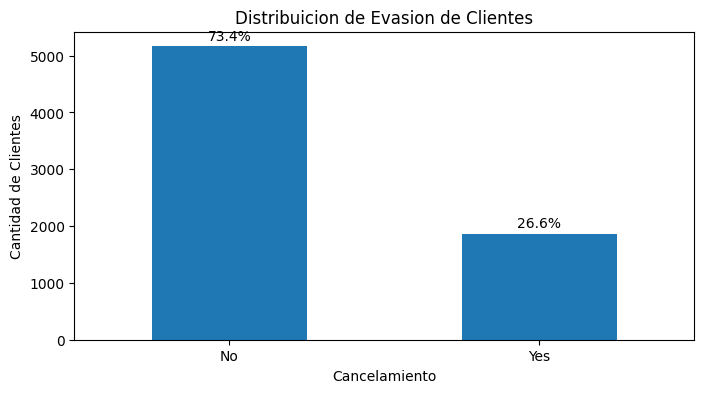

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
churn_counts = df['Churn'].value_counts()
churn_percentages = (churn_counts / len(df)) * 100

ax = churn_counts.plot(kind='bar')
plt.title('Distribuicion de Evasion de Clientes')
plt.xlabel('Cancelamiento')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=0)

for i, percentage in enumerate(churn_percentages):
    ax.text(i, churn_counts.iloc[i] + 50, f'{percentage:.1f}%', ha='center', va='bottom')

plt.show()

## Recuento de evasión por variables categóricas

In [25]:
import plotly.express as px
px.histogram(df, x = 'genero', text_auto = True, color = 'Churn', barmode = 'group')

In [26]:
px.histogram(df, x = 'tipo_contrato', text_auto = True, color = 'Churn', barmode = 'group')

In [27]:
px.histogram(df, x = 'metodo_pago',  text_auto = True, color = 'Churn', barmode = 'group')

In [29]:
px.histogram(df, x = 'tipo_internet',  text_auto = True, color = 'Churn', barmode = 'group')

## Conteo de evasión por variables numéricas

In [28]:
px.histogram(df, x = 'tiempo_contrato', text_auto = True, color = 'Churn', barmode = 'group')

# 📄Informe final
## 1. Introducción
El objetivo de este análisis es identificar patrones y factores que contribuyen a la evasión de clientes (Churn) en TelecomX LATAM. La retención de clientes es crucial para el éxito a largo plazo de la empresa, y comprender las razones detrás del Churn permitirá implementar estrategias efectivas para mejorar la satisfacción del cliente y reducir la tasa de cancelamientos.

## 2. Limpieza y Tratamiento de Datos
Los datos fueron importados desde un archivo JSON y convertidos en un DataFrame de Pandas. Se realizaron las siguientes acciones de limpieza y tratamiento de datos:
- Se verificaron y eliminaron valores duplicados.
- Se identificaron y eliminaron filas con valores nulos en la columna `account.Charges.Total`.
- Se convirtieron las columnas numéricas a su tipo adecuado.
- Se eliminaron filas con valores vacíos en la columna `Churn`.

## 3. Análisis Exploratorio de Datos
Se realizó un análisis exploratorio de datos para comprender mejor las características de los clientes que abandonan el servicio. A continuación, se presentan algunos hallazgos clave:
- La distribución de evasión muestra que un porcentaje significativo de clientes ha cancelado su servicio.
- Se observaron diferencias en la tasa de evasión según el tipo de contrato, método de pago y tipo de servicio de internet.
- Los clientes con contratos a corto plazo tienden a tener una mayor tasa de evasión en comparación con aquellos con contratos a largo plazo.

## 4. Conclusiones e Insights
En conclusión, el análisis de datos ha revelado patrones significativos en la evasión de clientes en TelecomX LATAM. Los factores como el tipo de contrato, método de pago y tipo de servicio de internet juegan un papel crucial en la decisión de los clientes de cancelar sus servicios. Estos insights pueden guiar a la empresa en la implementación de estrategias específicas para mejorar la retención de clientes, como ofrecer incentivos para contratos a largo plazo, diversificar los métodos de pago y mejorar la calidad del servicio de internet. Al abordar estos aspectos, TelecomX LATAM puede reducir efectivamente su tasa de evasión y fortalecer su base de clientes.

## 5. Recomendaciones
Se recomienda a TelecomX LATAM considerar las siguientes estrategias para reducir la evasión de clientes:
1. **Incentivos para Contratos a Largo Plazo**: Ofrecer descuentos o beneficios adicionales para clientes que opten por contratos de mayor duración.
2. **Diversificación de Métodos de Pago**: Introducir más opciones de pago flexibles para adaptarse a las preferencias de los clientes.
3. **Mejora del Servicio de Internet**: Invertir en la mejora de la infraestructura y calidad del servicio de internet para aumentar la satisfacción del cliente.
4. **Programas de Fidelización**: Implementar programas de fidelización que recompensen a los clientes leales y reduzcan la probabilidad de cancelación.
5. **Análisis Continuo de Datos**: Mantener un análisis continuo de los datos de clientes para identificar tendencias emergentes y ajustar las estrategias en consecuencia.